# Algorytmy macierzowe - eliminacja Gaussa
## Wykonali: Robert Kazimirek, Paweł Kruczkiewicz


**Numer ćwiczenia: 1**

*Treść ćwiczenia*: 

Proszę napisać procedurę [S]=Schur_Complement(A,n,m)  gdzie A to macierz wejściowa, n to rozmiar tej macierzy A,  m to rozmiar podmacierzy (tzw. dopełnienia Schura),  powstałej poprzez wyeliminowanie n-m wierszy i kolumn  z macierzy A, wykorzystując [zatrzymując po n-m krokach]:


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Badany algorytm
Co to robi, do czego się to stosuje, jak będziemy to badać

In [1]:
def schur_compliment(A, m):
    n = A.shape[0]
    number_of_steps = min(n - m, n - 1)
    for k in range(number_of_steps):
        akk = A[k,k]
        for j in range(k+1, n):
            A[j, k:n] -= A[k, k:n]*(A[j,k]/akk)

### Funkcje pomocnicze
Dla wygody i klarowności przygotowaliśmy kilka funkcji, które pomogą w przeprowadzanym badaniu

**Wczytywanie pliku csv z macierzą**

In [3]:
def get_matrix_from_csv(csv_file):
    return np.loadtxt(open(csv_file, "rb"), delimiter=",", skiprows=0)

**Funkcja spy**

In [5]:
def spy(matrix, label, plot):
    mask = matrix == 0
    plot.matshow(mask)

**Funkcja "powielająca" macierz**, tj. dla podanego parametru `q` będacego liczbą naturalną oraz dla macierzy o wymiarach `n x n` zwraca macierz o wymiarach `(q*n) x (q*n)` będąca q-krotnym powtórzeniem wejściowym macierzy wzdłóż obu boków.

In [6]:
def scale_matrix(A, q):
    B = np.vstack([A]*q)
    C = np.hstack([B]*q)
    return C

**Pomiar czasu**

In [7]:
from time import time

def log_time(func):
    t1 = time()
    func()
    t2 = time()
    return t2 - t1

**Rysowanie wykresu**

In [8]:
def show_line_plot(x_vals, y_vals, title, x_label, y_label):
    x_vals = [element * 81 for element in x_vals]
    x_pos = list(range(len(x_vals)))
    plt.plot(x_pos, y_vals, color='green')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(x_pos, x_vals)

    plt.show()

**Funkcja mierząca czas procedury**

In [9]:
def get_schur_compliment_time(A, m):
    number_of_experiments = 5
    times = [log_time(lambda: schur_compliment(A.copy(), m))
         for _ in range(number_of_experiments)]
    return round(sum(times)/number_of_experiments, 5)

def get_schur_compliment_times(matrices, m_func):
    return [get_schur_compliment_time(matrix, m_func(matrix.shape[0])) for matrix in matrices]

def get_schur_compliment_times_wrapper(csv_file, m_func, qs):
    original_matrix = get_matrix_from_csv(csv_file)
    matrices = [scale_matrix(original_matrix, q) for q in qs]
    return get_schur_compliment_times(matrices, m_func)

**Przygotowanie wywołania funkcji**

In [10]:
qs = [1,2,3,4,5,10,20]   # możliwe, że to trzeba będzie zmienić, żeby czasy były dłuższe

m_half_fun = lambda n: n//2
m_quater_fun = lambda n: n//4
m_single_fun = lambda n: 1

get_schur_compliment_times_for_fem = lambda m_fun: get_schur_compliment_times_wrapper(csv_file, m_fun, qs)

## Ad. 1
Badamy algorytm na przykładzie macierzy IGA.

**Wybór macierzy**

Naszą macierzą jest macierz wygenerowana za pomocą procedury `massmatrix(0,7,2,0)`, którą następnie zapisaliśmy do pisaliśmy do pliku csv i wczytaliśmy poniżej. Ma ona rozmiar `81x81`.

Następnie w testach sprawdzamy czas wykonania badanej faktoryzacji na zwielokrotnionych przez funkcję `scale_matrix(A, q)` macierzach, gdzie kolejne wartości parametru `q` zostały ustalone arbitralnie.

In [11]:
csv_file = "csv/iga81_2.csv"

**Działanie dla parametru `m = n/2`**

C:\Users\pawel\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


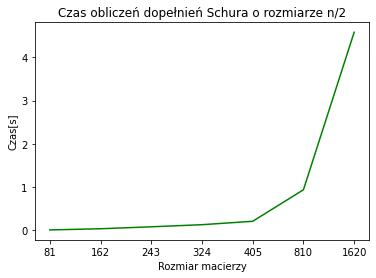

In [12]:
times = get_schur_compliment_times_for_fem(m_half_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/2", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/4`**

C:\Users\pawel\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


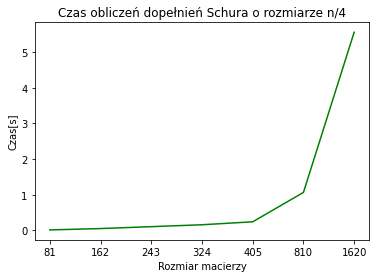

In [13]:
times = get_schur_compliment_times_for_fem(m_quater_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/4", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = 1`**

<ipython-input-38-2d029c5545c5>:7: RuntimeWarning: invalid value encountered in true_divide
  A[j, k:n] -= A[k, k:n]*A[j,k]/akk


[0, 1, 2, 3, 4, 5, 6]


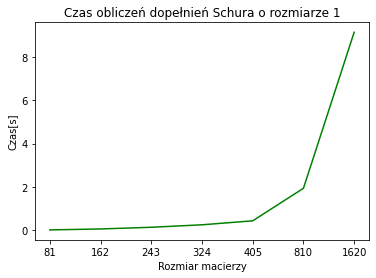

In [108]:
times = get_schur_compliment_times_for_fem(m_single_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze 1", "Rozmiar macierzy", "Czas[s]")

## Ad. 2
Badamy algorytm na przykładzie macierzy FEM.

**Wybór macierzy**

Wybór i przetworzenie macierzy do testów było analogiczne do punktu 1.

In [109]:
csv_file = "csv/fem81_2.csv"

**Działanie dla parametru `m = n/2`**

<ipython-input-38-2d029c5545c5>:7: RuntimeWarning: invalid value encountered in true_divide
  A[j, k:n] -= A[k, k:n]*A[j,k]/akk


[0, 1, 2, 3, 4, 5, 6]


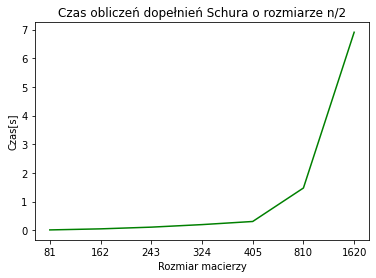

In [110]:
times = get_schur_compliment_times_for_fem(m_half_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/2", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = n/4`**

<ipython-input-38-2d029c5545c5>:7: RuntimeWarning: invalid value encountered in true_divide
  A[j, k:n] -= A[k, k:n]*A[j,k]/akk


[0, 1, 2, 3, 4, 5, 6]


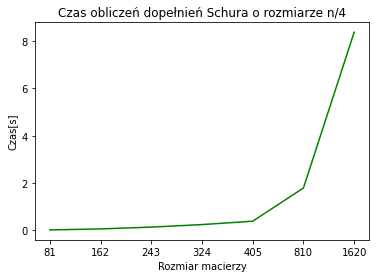

In [111]:
times = get_schur_compliment_times_for_fem(m_quater_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze n/4", "Rozmiar macierzy", "Czas[s]")

**Działanie dla parametru `m = 1`**

<ipython-input-38-2d029c5545c5>:7: RuntimeWarning: invalid value encountered in true_divide
  A[j, k:n] -= A[k, k:n]*A[j,k]/akk


[0, 1, 2, 3, 4, 5, 6]


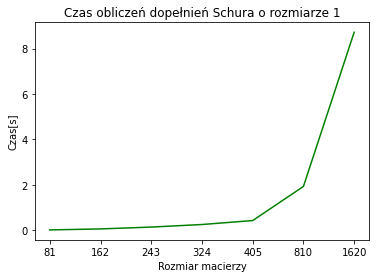

In [112]:
times = get_schur_compliment_times_for_fem(m_single_fun)
show_line_plot(qs, times, "Czas obliczeń dopełnień Schura o rozmiarze 1", "Rozmiar macierzy", "Czas[s]")

## Ad. 3
Obliczenie kosztu obliczeniowego oraz pamięciowego (*flops* i *memops*)

W funkcji `schur_compliment(A, m)` pierwsze 2 linie są potrzebne jedynie w celu przygotowania właściwych parametrów dla głównej procedury. W związku z tym nie dodajemy ich do obliczeń. <br>
Ponadto zakładamy, że liczba iteracji pierwszej pętli `for` jest równa `n - m`, ponieważ taką wartość przyjmuje zmienna `number_of_steps` w przypadku podania właściwego parametru `m`.



### Koszt obliczeniowy

Flopsy obliczyliśmy badając liczbę wykonanych operacji zmiennoprzecinkowych w kolejnych linijkach kodu.


![Flopsy obliczone](screeny/flop_opisany.png)


### Koszt pamięciowy

Koszt pamięciowy został obliczony analogicznie jak liczba operacji zmiennoprzecinkowych. Wyniki przedstawiono poniżej:

![Flopsy obliczone](screeny/memop.gif)

## Wnioski